# Import Data Set

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib inline


df= pd.DataFrame
train = pd.read_csv('train.csv')

# Exploring Data Set

In [2]:
mean = df(train.TARGET.value_counts())
mean['Percentage'] = 100*mean['TARGET']/mean['TARGET'].sum()
mean

#Only about 4% of customers are unhappy! 

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


In [3]:
#Check for null data
nullcols=df(train.isnull().sum())
nullcols[nullcols[0]>0]

#No null data detected!

,0


In [4]:
variables=df(columns=['count','dtype'])
for column in train.keys():
    col_count = df(train[column].value_counts()).sort_index()
    datatype = train[column].dtype
    variables.loc[column]=[len(col_count),datatype]

variables['cat_cont']=0


# variables[variables.cat_cont==0].sort_values('count')
dtype=df(variables.dtype.value_counts())
dtype['Percentage'] = 100*dtype['dtype']/dtype['dtype'].sum()
dtype

#70% of columns have integer variables - potentially categorical.
#111 columns have floating variables - potentially continuous

,dtype,Percentage
int64,260,70.080863
float64,111,29.919137


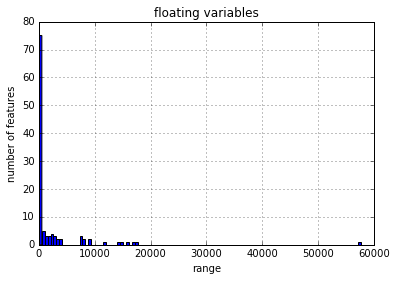

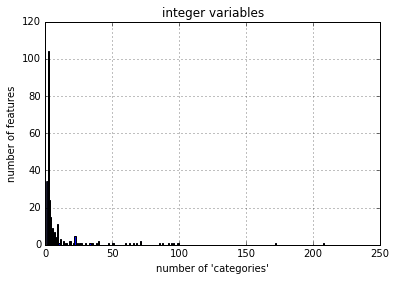

In [5]:
#Select columns with integer/floating values and check the variables

def floatvsint(table,datatype):
    for column in datatype.keys():
        if column != 'ID':
            col_count = df(datatype[column].value_counts()).sort_index()
            table.loc[column]=len(col_count)
        else: 
            pass
    return table

#Float variables
float_variables=df(columns=['count'])
floating = train.select_dtypes(include=['float'])

float_variables = floatvsint(float_variables, floating)
float_variables.hist(bins=len(float_variables))
plt.title('floating variables')
plt.xlabel("range")
plt.ylabel('number of features')

#Int variables
int_variables=df(columns=['count'])
integers = train.select_dtypes(include=['int'])
        

int_variables = floatvsint(int_variables, integers)
int_variables.hist(bins=len(int_variables))
plt.title('integer variables')
plt.xlabel("number of 'categories'")
plt.ylabel('number of features')

Majority of the variables with dtype='int' have less than 50 categories. Those with a lot of categories could actually be continuous variables but stored as an integer rather than a floating variable, e.g. age. We might want to look into these further to determine which are categorical and which are continuous.

A lot of variables with dtype = 'float' have very small ranges. We might want to look into these to see if these are indeed 'continuous', or they are actually categorical but just stored with a floating data type.

The whole point of trying to understand if a variable is 'continuous' or 'categorical' is so that we might have to create new dummy variables for continuous variables / categorical variables with a lot of categories. 

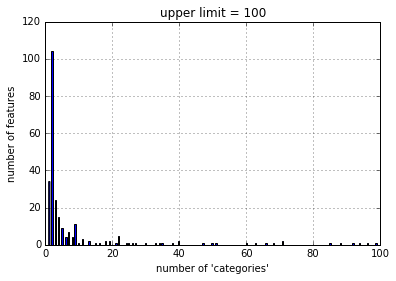

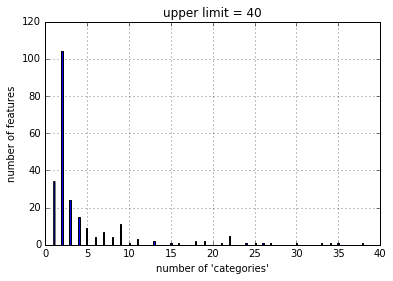

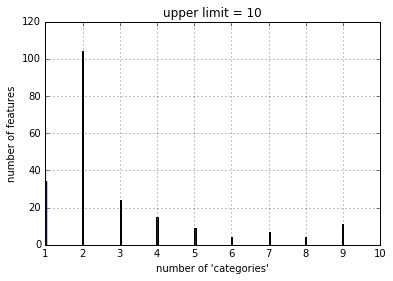

In [6]:
#Checking variables with 'int' dtype
def leX(table, upper_limit):
    dataset = table[table['count']<upper_limit]
    dataset.hist(bins=len(dataset))
    plt.title('upper limit = '+str(upper_limit))
    plt.xlabel("number of 'categories'")
    plt.ylabel('number of features')

leX(int_variables,100)
leX(int_variables,40)
leX(int_variables,10)

Majority of the features with dtype='int' are 'categorical'. About ~40 features have only 1 category - redundant columns (could get rid of them). Majority of the features (~150) have LE 10 categories (categorical).

Next steps: 

 1. drop features that only have 1 'category'. 
 2. Classify features with only LE 10 categories as 'categorical'.
 3. Classify features with GT 10 categories as 'continuous'


In [7]:
variables.loc[(variables['dtype'] =='int64') & (variables['count'] < 2), 'cat_cont']='drop'
variables.loc[(variables['dtype'] =='int64') & (variables['count'] < 11)
                                             & (variables['count'] > 1), 'cat_cont']='categorical'
remaining = variables[(variables['dtype']=='int64') & (variables['cat_cont'] == 0)]
print(len(remaining))

47


In [8]:
print(remaining.index)
def plot_varhist(plotvar):
    var=plotvar.name
    bins = len(plotvar.value_counts().sort_index())
    plt.hist(plotvar, bins=bins)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('number of observations')
    plt.show()    

Index([u'ID', u'var3', u'var15', u'num_var17_0', u'num_op_var40_hace2',
       u'num_op_var40_ult1', u'num_op_var40_ult3', u'num_op_var41_hace2',
       u'num_op_var41_hace3', u'num_op_var41_ult1', u'num_op_var41_ult3',
       u'num_op_var39_hace2', u'num_op_var39_hace3', u'num_op_var39_ult1',
       u'num_op_var39_ult3', u'num_var30_0', u'num_var31_0', u'num_var35',
       u'num_var37_med_ult2', u'num_var37_0', u'num_var37',
       u'imp_aport_var33_hace3', u'var21', u'num_ent_var16_ult1',
       u'num_var22_hace2', u'num_var22_hace3', u'num_var22_ult1',
       u'num_var22_ult3', u'num_med_var22_ult3', u'num_med_var45_ult3',
       u'num_op_var39_comer_ult1', u'num_op_var39_comer_ult3',
       u'num_op_var40_comer_ult1', u'num_op_var40_comer_ult3',
       u'num_op_var41_comer_ult1', u'num_op_var41_comer_ult3',
       u'num_op_var41_efect_ult1', u'num_op_var41_efect_ult3',
       u'num_op_var39_efect_ult1', u'num_op_var39_efect_ult3',
       u'num_var43_emit_ult1', u'num_var43_recib_ul

##### Checking Var3 column

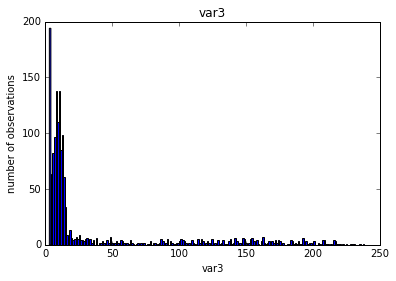

number of var3 < 0:  116
number of var3 = 2:  74165
max var3 :  238
min var3 :  -999999
mode var3 (gt 2):  8
median var3 (gt 2):  11.0
Total var3 observations:  76020


In [9]:
var3 = train.var3
var3gt2 = train[train['var3']>2]['var3']
plot_varhist(var3gt2)


print("number of var3 < 0: ", len(train[train['var3']<0]))
print("number of var3 = 2: ", len(train[train['var3']==2]))
print("max var3 : ", var3gt2.max())
print("min var3 : ", var3.min())
print("mode var3 (gt 2): ", var3gt2.mode()[0])
print("median var3 (gt 2): ", var3gt2.median())
print("Total var3 observations: ", len(train))

variables.loc['var3','cat_cont']='continuous'

Majority of Var3 have values = 2. 116 have value = -99999. Rest have values spread around 3 - 238 (mode=8m, median = 11). Could potentially treat var3 as a continuous variable.

##### Checking Var15 column

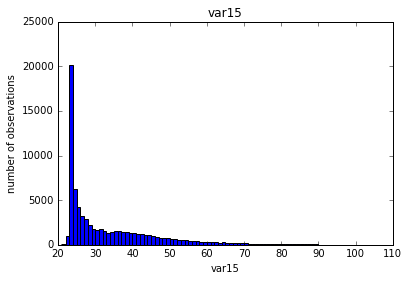

number of var15 < 20:  242
max var15 :  105
min var15 :  5
mode var15 (gt 20):  23
median var15 (gt 20):  28.0
Total var15 observations:  76020


In [10]:
var15 = train.var15
var15gt20 = train[train['var15']>20].var15


plot_varhist(var15gt20)

print("number of var15 < 20: ", len(train[train['var15']<20]))
print("max var15 : ", var15gt20.max())
print("min var15 : ", var15.min())
print("mode var15 (gt 20): ", var15gt20.mode()[0])
print("median var15 (gt 20): ", var15gt20.median())
print("Total var15 observations: ", len(train))

variables.loc['var15','cat_cont']='continuous'

Majority of Var15 is 23. About 242 observation has var15 = 5. Median var15 is 28, max var15 is 105. Var 15 looks a little bit like 'age'! Treat var15 as continuous (age is a continuous variable)

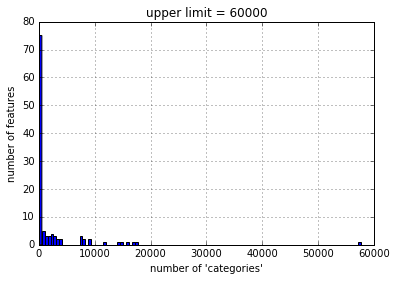

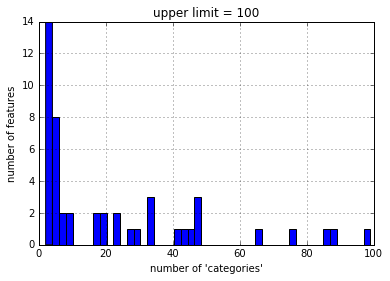

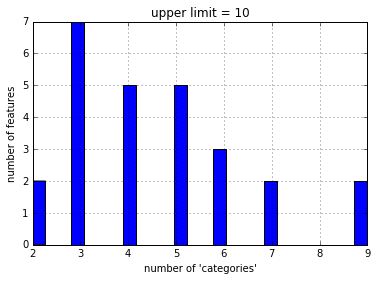

In [11]:
leX(float_variables,60000)
leX(float_variables,100)
leX(float_variables,10)

Seems like for floating variables, there are some features that have less than 10 'categories' - could they be categorical features but their data is stored as floating point instead of integers?

In [12]:
variables.loc[(variables['dtype'] =='float64') & (variables['count'] > 10), 'cat_cont']='continuous'
remaining_float = variables[(variables['dtype']=='float') & (variables['cat_cont'] == 0)]
print(len(remaining_float))
print(remaining_float.index)

26
Index([u'saldo_var6', u'saldo_var29', u'delta_imp_aport_var17_1y3',
       u'delta_imp_aport_var33_1y3', u'delta_imp_venta_var44_1y3',
       u'delta_num_aport_var13_1y3', u'delta_num_aport_var17_1y3',
       u'delta_num_aport_var33_1y3', u'delta_num_compra_var44_1y3',
       u'delta_num_venta_var44_1y3', u'imp_amort_var18_ult1',
       u'imp_amort_var34_ult1', u'imp_var7_emit_ult1',
       u'imp_reemb_var17_hace3', u'imp_trasp_var17_in_hace3',
       u'imp_trasp_var17_in_ult1', u'imp_trasp_var17_out_ult1',
       u'imp_trasp_var33_in_hace3', u'imp_trasp_var33_in_ult1',
       u'imp_venta_var44_hace3', u'saldo_medio_var13_medio_hace2',
       u'saldo_medio_var13_medio_ult3', u'saldo_medio_var29_hace2',
       u'saldo_medio_var29_hace3', u'saldo_medio_var29_ult1',
       u'saldo_medio_var29_ult3'],
      dtype='object')


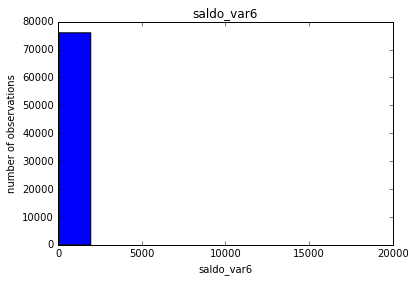

0.0        76018
11976.6        1
19531.8        1
Name: saldo_var6, dtype: int64


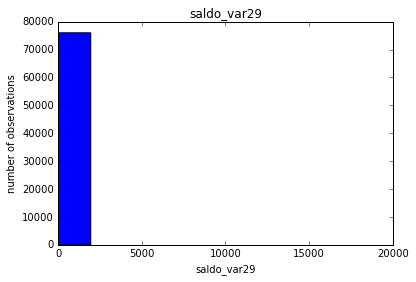

0.0        76018
11976.6        1
19531.8        1
Name: saldo_var29, dtype: int64


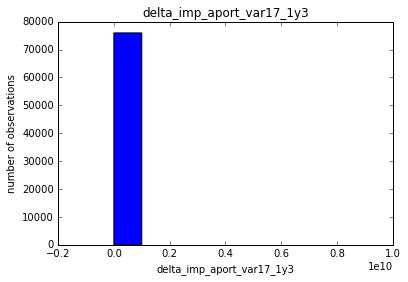

 0.000000e+00    75960
 1.000000e+10       39
-1.000000e+00       17
 1.000055e+00        1
 1.500000e+00        1
 6.853333e-01        1
-7.500000e-01        1
Name: delta_imp_aport_var17_1y3, dtype: int64


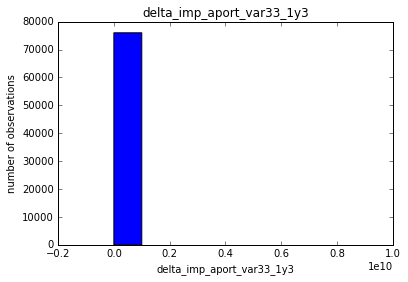

 0.000000e+00    75996
-1.000000e+00       17
 1.000000e+10        1
-6.666667e-01        1
-7.000000e-01        1
-9.500000e-01        1
-9.404762e-01        1
-9.160000e-01        1
-5.000000e-01        1
Name: delta_imp_aport_var33_1y3, dtype: int64


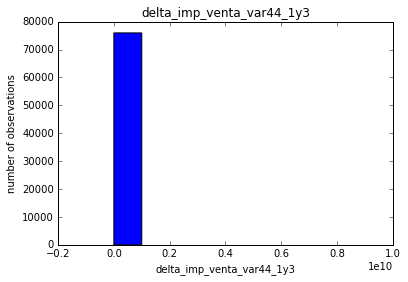

 0.000000e+00    75975
 1.000000e+10       42
-1.000000e+00        1
 5.417098e+00        1
-5.057733e-01        1
Name: delta_imp_venta_var44_1y3, dtype: int64


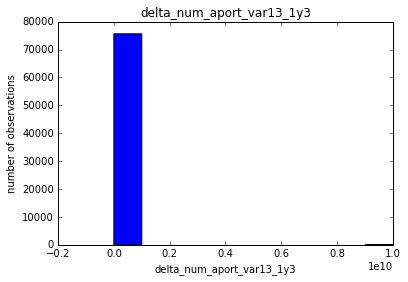

 0.000000e+00    73970
-1.000000e+00     1675
 1.000000e+10      370
 1.000000e+00        3
-3.333333e-01        1
-5.000000e-01        1
Name: delta_num_aport_var13_1y3, dtype: int64


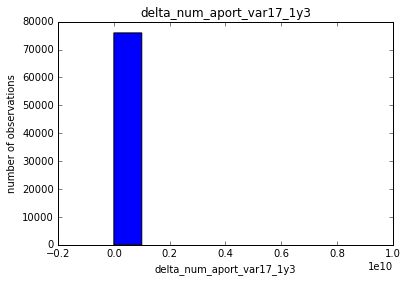

 0.000000e+00    75961
 1.000000e+10       39
-1.000000e+00       17
-3.333333e-01        1
 2.000000e+00        1
 1.000000e+00        1
Name: delta_num_aport_var17_1y3, dtype: int64


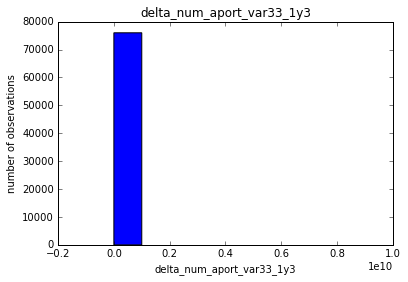

 0.000000e+00    76001
-1.000000e+00       17
 1.000000e+10        1
-5.000000e-01        1
Name: delta_num_aport_var33_1y3, dtype: int64


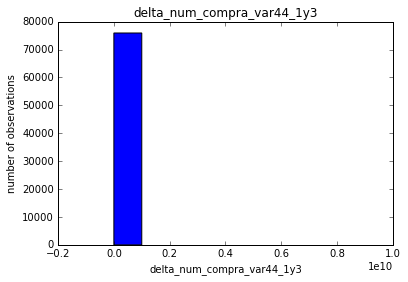

 0.000000e+00    75923
 1.000000e+10       70
-1.000000e+00       18
 1.000000e+00        3
 4.000000e+00        2
-3.333333e-01        1
-6.666667e-01        1
 2.500000e+00        1
 5.000000e-01        1
Name: delta_num_compra_var44_1y3, dtype: int64


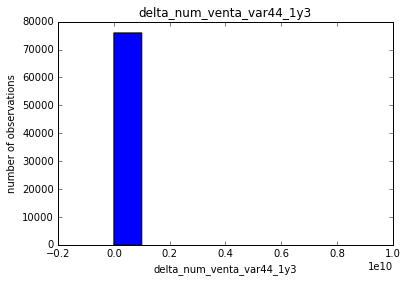

 0.000000e+00    75975
 1.000000e+10       42
-1.000000e+00        1
 8.000000e+00        1
-5.000000e-01        1
Name: delta_num_venta_var44_1y3, dtype: int64


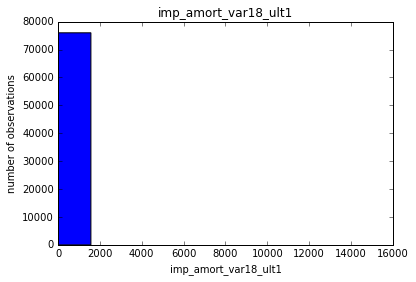

0.00        76018
1883.22         1
15691.80        1
Name: imp_amort_var18_ult1, dtype: int64


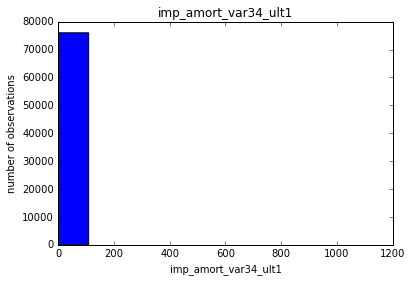

0.00       76018
1096.02        1
276.24         1
Name: imp_amort_var34_ult1, dtype: int64


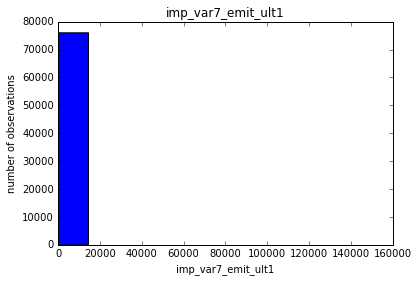

0.00         76017
145384.92        1
43500.00         1
18000.00         1
Name: imp_var7_emit_ult1, dtype: int64


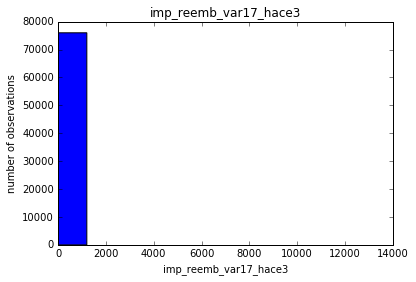

0.00        76019
12027.15        1
Name: imp_reemb_var17_hace3, dtype: int64


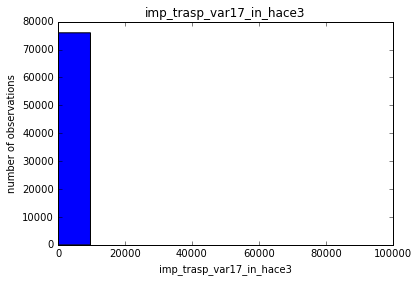

0.00        76018
96781.44        1
45741.48        1
Name: imp_trasp_var17_in_hace3, dtype: int64


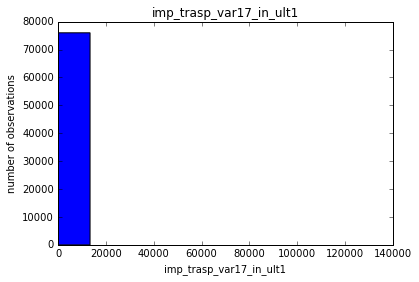

0.00         76016
133730.58        1
2999.82          1
39927.15         1
14356.26         1
Name: imp_trasp_var17_in_ult1, dtype: int64


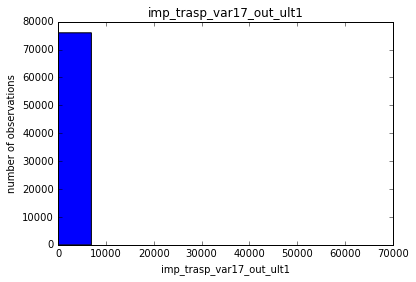

0.00        76016
3059.52         1
69599.01        1
3192.27         1
69622.29        1
Name: imp_trasp_var17_out_ult1, dtype: int64


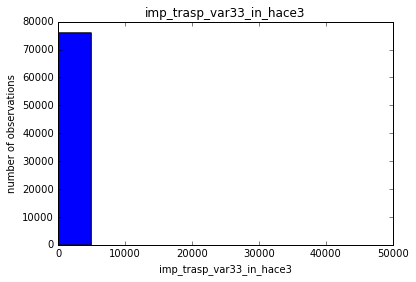

0.00        76014
33079.83        1
33744.48        1
25501.80        1
44251.08        1
49581.27        1
25920.03        1
Name: imp_trasp_var33_in_hace3, dtype: int64


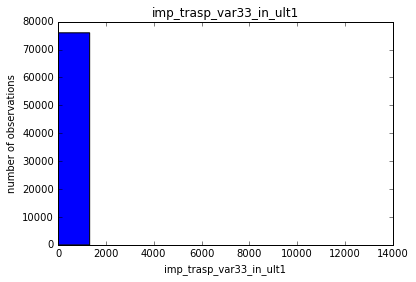

0.00        76015
2596.53         1
2545.65         1
174.09          1
13207.32        1
5400.00         1
Name: imp_trasp_var33_in_ult1, dtype: int64


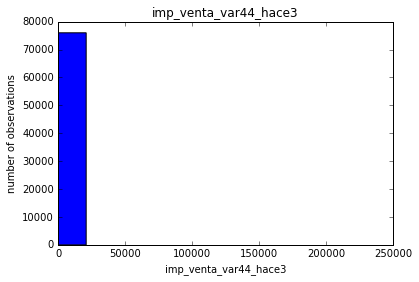

0.00         76017
78040.59         1
209834.40        1
23.16            1
Name: imp_venta_var44_hace3, dtype: int64


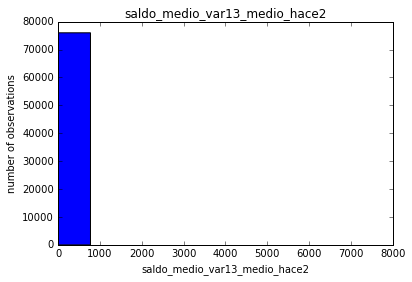

0.00       76018
5586.21        1
7741.95        1
Name: saldo_medio_var13_medio_hace2, dtype: int64


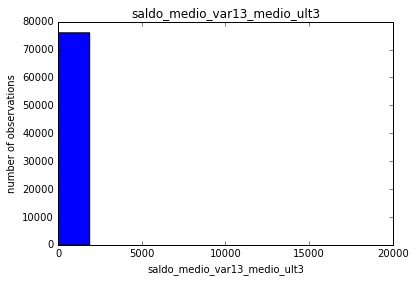

0.00        76018
7293.12         1
18870.99        1
Name: saldo_medio_var13_medio_ult3, dtype: int64


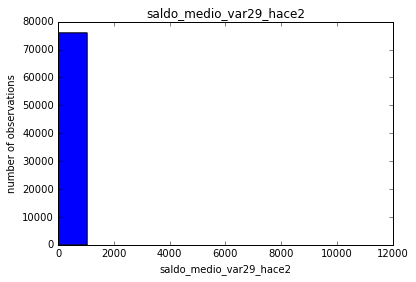

0.00        76016
10430.01        1
4838.70         1
868.98          1
59.97           1
Name: saldo_medio_var29_hace2, dtype: int64


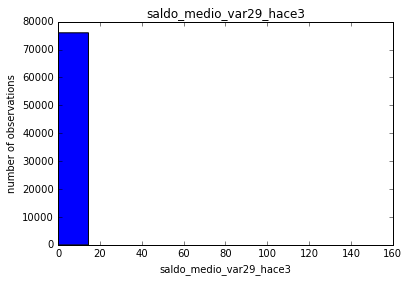

0.0      76019
145.2        1
Name: saldo_medio_var29_hace3, dtype: int64


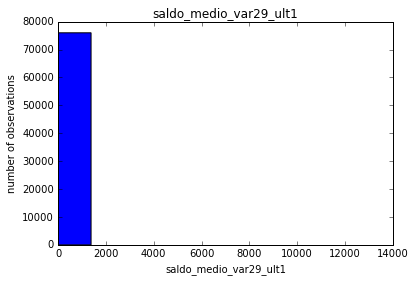

0.00        76017
2142.87         1
13793.67        1
3365.46         1
Name: saldo_medio_var29_ult1, dtype: int64


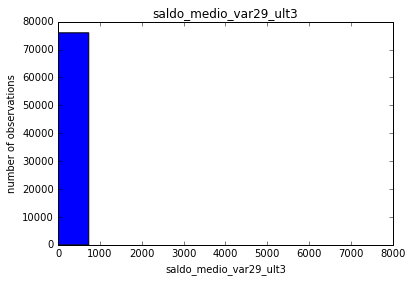

0.00       76017
3490.80        1
7331.34        1
3365.46        1
Name: saldo_medio_var29_ult3, dtype: int64


In [13]:
for col in remaining_float.index:
    column = train[col]
    var=column.name
#     bins = len(column.value_counts().sort_index())
    bins=10
    plt.hist(column, bins=bins)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('number of observations')
    plt.show()    
    print(column.value_counts())

Data does seem to suggest that these should be classified as 'continuous' variables. However majority of the rows actually have value = 0. We could possibly create dummy variables at later stage to create a 'zero' flag and a 'non-zero' flag.

In [14]:
variables.loc[(variables['dtype'] =='float64'), 'cat_cont']='continuous'
variables.loc[(variables['cat_cont']==0)]='continuous'

In [15]:
variables[(variables['cat_cont']=='drop')]

,count,dtype,cat_cont
ind_var2_0,1,int64,drop
ind_var2,1,int64,drop
ind_var27_0,1,int64,drop
ind_var28_0,1,int64,drop
ind_var28,1,int64,drop
ind_var27,1,int64,drop
ind_var41,1,int64,drop
ind_var46_0,1,int64,drop
ind_var46,1,int64,drop
num_var27_0,1,int64,drop


In [23]:
x=variables[(variables['cat_cont']=='drop')].index.tolist()

In [25]:
import pickle
with open('droplist', 'wb') as fp:
    pickle.dump(x, fp)